<a href="https://colab.research.google.com/github/ZainGeeky/Predicting-Heart-Disease-through-Machine-Learning-/blob/main/Day_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data =pd.read_csv('https://talentcocomedia.s3.amazonaws.com/ml-assets/heart-disease.csv')

In [3]:
y = data['target']

In [4]:
x = data.drop('target', axis =1)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((212, 13), (91, 13), (212,), (91,))

# Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(penalty='l2', solver= 'newton-cg', C=5)

In [7]:
lr_model.fit(x_train,y_train)

LogisticRegression(C=5, solver='newton-cg')

In [8]:
y_pred_lr = lr_model.predict(x_test)
y_pred_lr

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1])

Accuracy:

In [9]:
from sklearn.metrics import accuracy_score
acc_lr = accuracy_score(y_pred_lr, y_test)
acc_lr

0.8021978021978022

# KNeighbors Classifiers

In [10]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
yPredKnn = neigh.predict(x_test)

In [12]:
yPredKnn

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0])

Gridsearch for KNN

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()


k_range = list(np.arange(1,30,1))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid)

grid.fit(x_train, y_train)

print(grid.best_score_)
print(grid.best_params_)


0.6983388704318937
{'n_neighbors': 18}


Accuracy:

In [14]:
accKnn = accuracy_score(yPredKnn , y_test)

In [15]:
accKnn

0.6263736263736264

# Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
yPredDtc = dtc.predict(x_test)
yPredDtc

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

GridsearchCv for Decision tree:

In [18]:

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier()

max_depth = list(range(1, 11))
min_samples_split = [2, 3, 4, 5]
min_samples_leaf = [1, 2, 3]
criterion = ['gini', 'entropy']
param_grid_dtree = dict(max_depth=max_depth, min_samples_split=min_samples_split, 
                  min_samples_leaf=min_samples_leaf, criterion=criterion)

grid_dtree = GridSearchCV(dtree, param_grid_dtree, cv=10, scoring='accuracy')


grid_dtree.fit(x_train, y_train)

print(grid_dtree.best_score_)
print(grid_dtree.best_params_)

0.8448051948051948
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3}


Accuracy:

In [19]:
accDtc = accuracy_score(yPredDtc , y_test)
accDtc

0.7142857142857143

From the above three comparisons, we got the highest accuracy using Linear Regression.

In [20]:
val =list(np.arange(1,20,1))
val

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [21]:
from sklearn.model_selection import GridSearchCV

model_lr = LogisticRegression(penalty='l2')

parameters = {'solver':('newton-cg', 'liblinear', 'sag', 'saga'), 'C':val}

clf_lr = GridSearchCV(model_lr, parameters)
clf_lr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19],
                         'solver': ('newton-cg', 'liblinear', 'sag', 'saga')})

In [22]:
print(clf_lr.best_params_)

{'C': 3, 'solver': 'newton-cg'}


In [23]:
test_pred = clf_lr.predict(x_test)

In [24]:
acc_lr_gs = accuracy_score(test_pred, y_test)
acc_lr_gs

0.8021978021978022

# Confusion Matrix

Confusion Matrix for Linear Regression

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_lr,y_test)

array([[27,  7],
       [11, 46]])

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_lr ))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        38
           1       0.81      0.87      0.84        53

    accuracy                           0.80        91
   macro avg       0.80      0.79      0.79        91
weighted avg       0.80      0.80      0.80        91



Confusion Matrix for DecisionTree Classifier

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yPredDtc,y_test)

array([[26, 14],
       [12, 39]])

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test,yPredDtc ))

              precision    recall  f1-score   support

           0       0.65      0.68      0.67        38
           1       0.76      0.74      0.75        53

    accuracy                           0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.72      0.71      0.72        91



Confusion Matrix for KNN

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yPredKnn,y_test)

array([[22, 18],
       [16, 35]])

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test,yPredKnn ))

              precision    recall  f1-score   support

           0       0.55      0.58      0.56        38
           1       0.69      0.66      0.67        53

    accuracy                           0.63        91
   macro avg       0.62      0.62      0.62        91
weighted avg       0.63      0.63      0.63        91



In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)

array([[27,  7],
       [11, 46]])

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        38
           1       0.81      0.87      0.84        53

    accuracy                           0.80        91
   macro avg       0.80      0.79      0.79        91
weighted avg       0.80      0.80      0.80        91



From the above Confusion Matrices, Linear Regression GridSearch CV has the maximum recall and Accuracy whereas the KNN has the least Recall and Accuracy.



# ROC AUC

Here we plot a graph of Receiver Operating Characteristic Curve (ROC) with FPR at the x axis and TPR at the y axis and find the roc_auc score.

In [33]:
logreg_probs = clf_lr.predict_proba(x_test)
Knn_probs = grid.predict_proba(x_test)
Dtree_probs = grid_dtree.predict_proba(x_test)

In [34]:
logreg_probs = logreg_probs[:, 1]
Knn_probs = Knn_probs[:, 1]
Dtree_probs = Dtree_probs[:, 1]

In [35]:
from sklearn.metrics import roc_curve
#fpr --> False Positive Rate
#tpr --> True Positive Rate
logreg_fpr, logreg_tpr, lr_thres = roc_curve(y_test, logreg_probs)
Knn_fpr, Knn_tpr, Knn_thres = roc_curve(y_test, Knn_probs)
Dtree_fpr, Dtree_tpr, Dtree_thres = roc_curve(y_test, Dtree_probs)

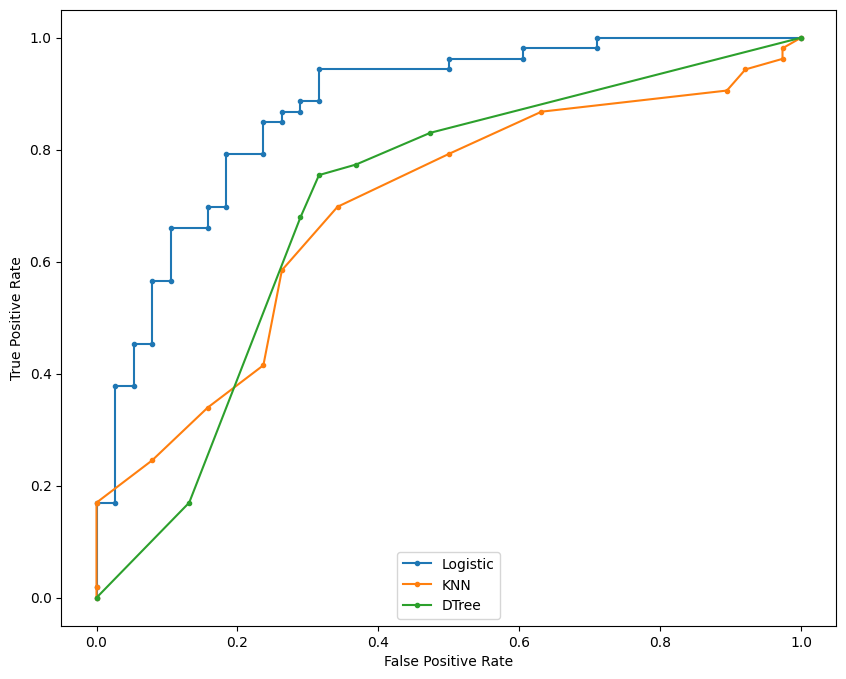

In [36]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(Knn_fpr, Knn_tpr, marker='.', label='KNN')
ax.plot(Dtree_fpr, Dtree_tpr, marker='.', label='DTree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend(loc=8)
# show the plot
plt.show()

In [37]:
from sklearn.metrics import roc_auc_score

# calculate scores
logreg_auc = roc_auc_score(y_test, logreg_probs)
Knn_auc = roc_auc_score(y_test, Knn_probs)
Dtree_auc = roc_auc_score(y_test, Dtree_probs)

print('Logistic: ROC AUC= {} %'.format(round(logreg_auc, 3)*100))
print('KNN: ROC AUC= {} %'.format(round(Knn_auc, 3)*100))
print('DTree: ROC AUC= {} %'.format(round(Dtree_auc, 3)*100))

Logistic: ROC AUC= 87.2 %
KNN: ROC AUC= 69.39999999999999 %
DTree: ROC AUC= 70.3 %


Maximum score of ROC AUC is given by Logistic Regression which is 87.2% and least score is given by KNN which is 69.4%

In [38]:
new_pass = np.array([2, 37, 53.1, 1, 0])
type(new_pass)

numpy.ndarray

In [39]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
#age = int(input("Age of the Patient: ")) 
#sex = int(input("Sex of the Patient (0 - female & 1 - male): ")) 
#cp = int(input("Chest Pain Type: ")) 
#trestbps = int(input("Resting Blood Pressure: ")) 
#chol = int(input("Serum Cholesterol: ")) 
#fbs = int(input("Fasting Blood Sugar: ")) 
#restecg = int(input("Resting Electrocardiographic Result: ")) 
#thalach = int(input("Maximum Heart Rate Achieved: ")) 
#exang = int(input("Exercise-induced angina (1 - True, 0 - False): ")) 
#oldpeak = float(input("ST Depression Induced by Exercise Relative to Rest: ")) 
#slope = int(input("Slope of Peak Exercise ST Segment: ")) 
#ca = int(input("Number of Major Vessels (0-3): ")) 
#thal = int(input("Thalassemia Indicator: ")) 

#new_patient = np.array([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal])
#new_patient = new_patient.reshape(1, -1)

#if clf_lr.predict(new_patient) == 0:
    #print("The patient with the above provided vitals dies!!!")
#else:
    #print("The patient with the above provided vitals lives!!!")


According to the Vitals taken from a random patient our model has predicted that the Patient Lives!. The model can be used to check the Status of any number of Patients at a time which is efficient and time saving.